In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


insurance_data = pd.read_excel('/Users/peytonbailey/WGU Data Science Masters/D599- Data Preparation and Exploration/Task Two/Health Insurance Dataset.xlsx', sheet_name='insurance')

In [233]:

insurance_data = insurance_data.dropna()
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,Level,score
0,19.0,female,27.900,0.0,yes,southwest,16884.924,B,72.0
1,18.0,male,33.770,1.0,no,southeast,1725.5523,C,69.0
2,28.0,male,33.000,3.0,no,southeast,4449.462,B,90.0
3,33.0,male,22.705,0.0,no,northwest,21984.47061,A,47.0
4,32.0,male,28.880,0.0,no,northwest,3866.8552,C,76.0


In [234]:
insurance_data.isna().sum()
insurance_data['charges'] = insurance_data['charges'].astype('float')


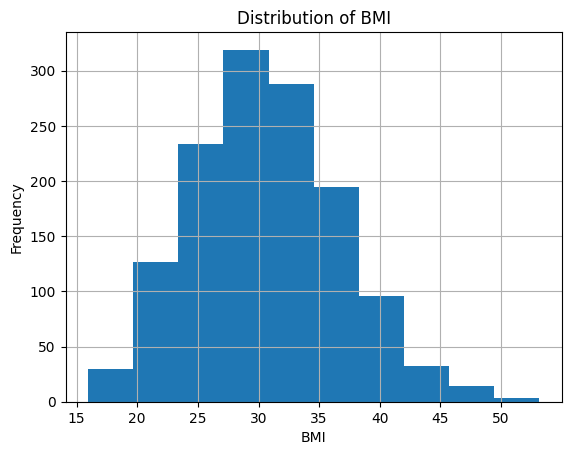

In [235]:
ax = insurance_data['bmi'].hist()
ax.set_title('Distribution of BMI')
ax.set_xlabel('BMI')
ax.set_ylabel('Frequency')
plt.show()

In [236]:
print(insurance_data['bmi'].describe())
insurance_data[insurance_data['bmi'] > 48.96]

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


,age,sex,bmi,children,smoker,region,charges,Level,score
116,58.0,male,49.06,0.0,no,southeast,11381.3254,B,75.0
847,23.0,male,50.38,1.0,no,southeast,2438.0552,D,64.0
1047,22.0,male,52.58,1.0,yes,southeast,44501.3982,C,66.0
1317,18.0,male,53.13,0.0,no,southeast,1163.4627,C,83.0


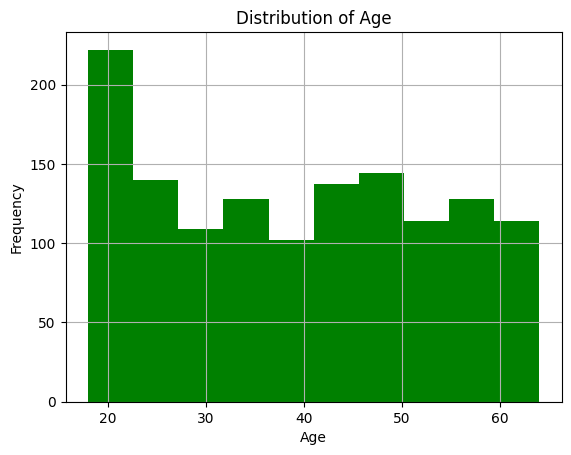

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


In [237]:
ax = insurance_data['age'].hist(color='green')
ax.set_title('Distribution of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
plt.show()
print(insurance_data['age'].describe())



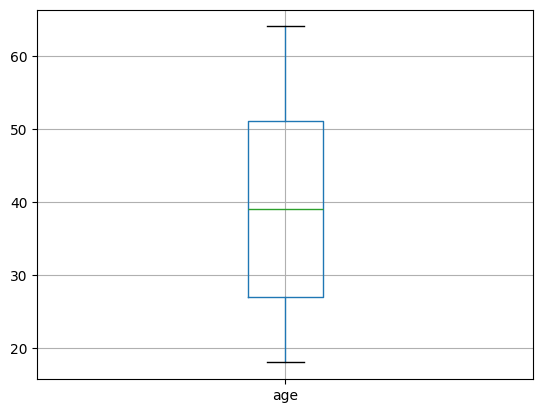

In [238]:
insurance_data.boxplot(column='age')
plt.show()

In [239]:
# Calculate value counts and percentages for gender
counts = insurance_data['sex'].value_counts()
ratios = insurance_data['sex'].value_counts(normalize=True) 

# Create summary table
summary_table = pd.DataFrame({'Frequency': counts, 'Ratios': ratios})

print(summary_table)

        Frequency    Ratios
sex                        
male          676  0.505232
female        662  0.494768


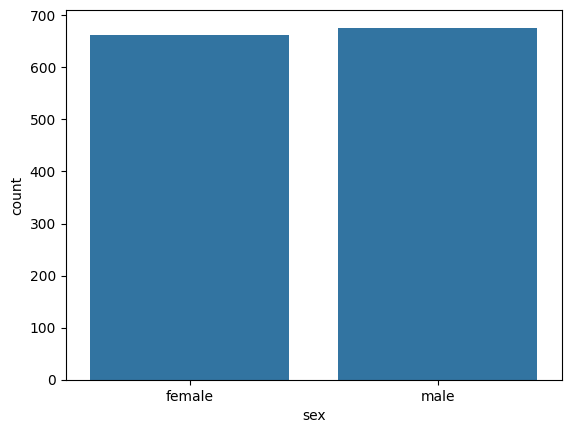

In [240]:
sns.countplot(x ='sex', data = insurance_data)
plt.show()

In [241]:
# Calculate value counts and percentages for gender
region_counts = insurance_data['region'].value_counts()
region_ratios = insurance_data['region'].value_counts(normalize=True) 

# Create a summary table
region_summary_table = pd.DataFrame({'Frequency': region_counts, 'Ratios': region_ratios})

print(region_summary_table)

           Frequency    Ratios
region                        
southeast        364  0.272048
southwest        325  0.242900
northwest        325  0.242900
northeast        324  0.242152


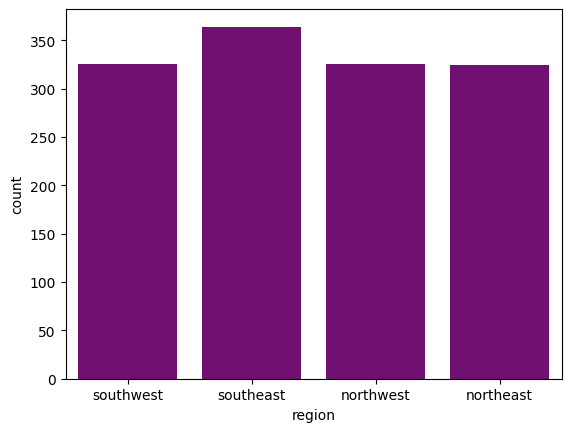

In [242]:
sns.countplot(x ='region', data = insurance_data, color = 'purple')
plt.show()

Intercept    28.803889
age           0.047428
dtype: float64


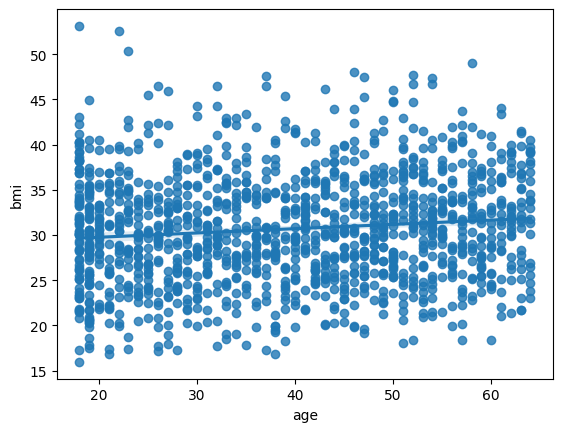

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     16.15
Date:                Sat, 15 Mar 2025   Prob (F-statistic):           6.19e-05
Time:                        20:40:04   Log-Likelihood:                -4309.1
No. Observations:                1338   AIC:                             8622.
Df Residuals:                    1336   BIC:                             8633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.8039      0.492     58.595      0.0

In [243]:
from statsmodels.formula.api import ols

age_vs_bmi = ols("bmi ~ age", data=insurance_data)

age_vs_bmi = age_vs_bmi.fit()
print(age_vs_bmi.params)

sns.regplot(x='age', y='bmi', data=insurance_data)
plt.show()

print(age_vs_bmi.summary())

In [244]:
region_contingency_table = insurance_data.groupby('region')['smoker'].value_counts(normalize=True)
region_contingency_table = region_contingency_table.unstack()
region_smoker_count = insurance_data.groupby('region')['smoker'].value_counts(normalize=False).unstack()
print(region_contingency_table)
print(region_smoker_count)

smoker           no       yes
region                       
northeast  0.793210  0.206790
northwest  0.821538  0.178462
southeast  0.750000  0.250000
southwest  0.821538  0.178462
smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


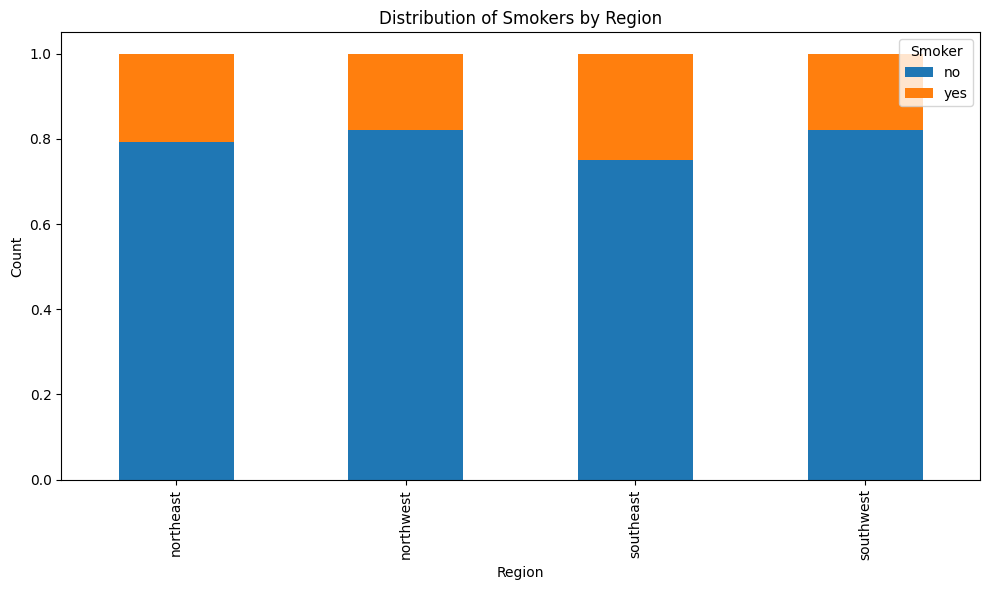

In [245]:

region_contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of Smokers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker', loc='upper right')
plt.tight_layout()
plt.show()

In [246]:
import pingouin

In [247]:
region_stats = expected, observed, region_stats = pingouin.chi2_independence(data=insurance_data, x='region', y='smoker')
print(region_stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  7.343478  3.0  0.061720  0.074084  0.612572
1        cressie-read  0.666667  7.297078  3.0  0.063008  0.073849  0.609517
2      log-likelihood  0.000000  7.214996  3.0  0.065352  0.073433  0.604075
3       freeman-tukey -0.500000  7.162475  3.0  0.066896  0.073165  0.600568
4  mod-log-likelihood -1.000000  7.117413  3.0  0.068248  0.072935  0.597543
5              neyman -2.000000  7.048749  3.0  0.070360  0.072582  0.592906


In [248]:
gender_stats = expected, observed, gender_stats = pingouin.chi2_independence(data=insurance_data, x='sex', y='smoker')
print(gender_stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  7.392911  1.0  0.006548  0.074333  0.776083
1        cressie-read  0.666667  7.399574  1.0  0.006524  0.074366  0.776449
2      log-likelihood  0.000000  7.420173  1.0  0.006450  0.074470  0.777578
3       freeman-tukey -0.500000  7.442057  1.0  0.006372  0.074579  0.778772
4  mod-log-likelihood -1.000000  7.469538  1.0  0.006275  0.074717  0.780264
5              neyman -2.000000  7.541656  1.0  0.006029  0.075077  0.784139


In [249]:

from scipy.stats import ttest_ind

smoker_bmi = insurance_data[insurance_data['smoker'] == 'yes']['bmi']
non_smoker_bmi = insurance_data[insurance_data['smoker'] == 'no']['bmi']

# Perform independent t-test
t_stat, p_value = ttest_ind(smoker_bmi, non_smoker_bmi)


print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 0.13708403310827058
P-value: 0.8909850280013041


In [250]:

from scipy.stats import mannwhitneyu

# Separate charges by smoker status
smoker_charges = insurance_data[insurance_data['smoker'] == 'yes']['charges']
non_smoker_charges = insurance_data[insurance_data['smoker'] == 'no']['charges']

# Mann-Whitney U-Test
stat, p_value = mannwhitneyu(smoker_charges, non_smoker_charges, alternative='greater')

# Print
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")


Mann-Whitney U Statistic: 284133.0
P-value: 2.6351167222517853e-130
